### 1. Klinkenberg Effect

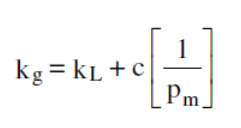


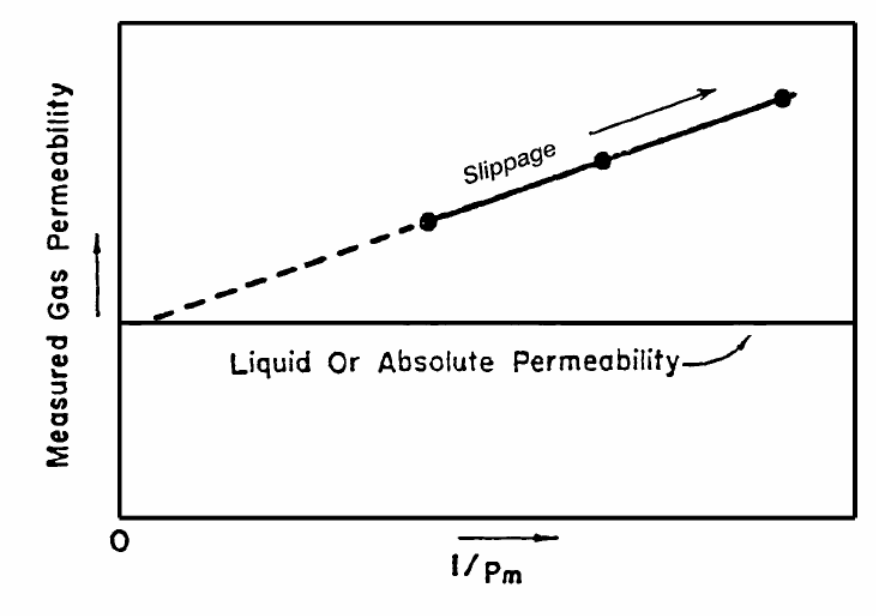

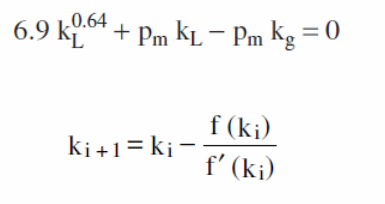"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
k = float(input('Enter the initisl guess of absolute Permeability(md): '))
pmean = float(input('Enter the mean pressure(psi): '))
kgas = float(input('Enter the gas perm. (md): '))

Enter the initisl guess of absolute Permeability(md): 200
Enter the mean pressure(psi): 3
Enter the gas perm. (md): 47


In [5]:
while abs(6.9*(k**0.64)+pmean*k-pmean*kgas) >0.0001:
    k = k - (6.9*(k**0.64)+pmean*k - pmean*kgas)/(4.416*(k**(-0.36))+pmean)

In [6]:
print("The value of absolute permeability after iteration or gas permeability at infinite pmean is ",k)


The value of absolute permeability after iteration or gas permeability at infinite pmean is  27.719739772927824


In [7]:
x = [0,1/pmean]
y = [k,kgas]

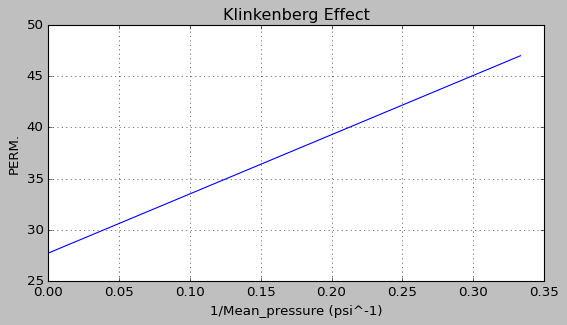

In [13]:
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.style.use('classic')
plt.xlabel('1/Mean_pressure (psi^-1)')
plt.ylabel('PERM.')
plt.title('Klinkenberg Effect')
plt.grid(True)

In [14]:
#plt.style.available

In [15]:
x,y

([0, 0.3333333333333333], [27.719739772927824, 47.0])

In [16]:
coefficients = np.polyfit(x,y,1)

In [17]:
coefficients

array([57.84078068, 27.71973977])

In [18]:
x_axis = np.linspace(0,0.5,200)
polynomial = np.poly1d(coefficients)
y_axis = polynomial(x_axis)

In [20]:
#x_axis

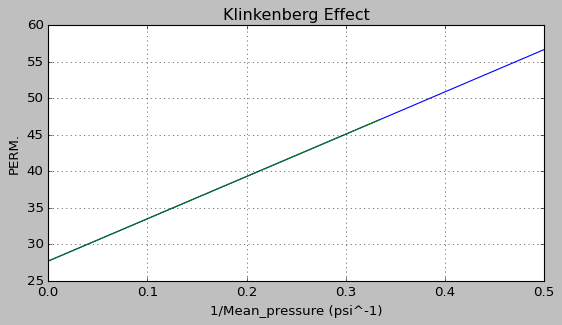

In [21]:
plt.figure(figsize=(8,4))
plt.plot(x_axis,y_axis)
plt.plot(x,y)

plt.style.use('classic')
plt.xlabel('1/Mean_pressure (psi^-1)')
plt.ylabel('PERM.')
plt.title('Klinkenberg Effect')
plt.grid(True)

In [22]:
def klinkenberg():
    k = float(input('Enter the initisl guess of absolute Permeability(md): '))
    pmean = float(input('Enter the mean pressure(psi): '))
    kgas = float(input('Enter the gas perm. (md): '))
    while abs(6.9*(k**0.64)+pmean*k-pmean*kgas) >0.0001:
        k = k - (6.9*(k**0.64)+pmean*k - pmean*kgas)/(4.416*(k**(-0.36))+pmean)
    print("The value of absolute permeability after iteration or gas permeability at infinite pmean is ",k)
    x = [0,1/pmean]
    y = [k,kgas]
    plt.figure(figsize=(8,4))
    plt.plot(x,y)
    plt.style.use('classic')
    plt.xlabel('1/Mean_pressure (psi^-1)')
    plt.ylabel('PERM.')
    plt.title('Klinkenberg Effect')
    plt.grid(True)

Enter the initisl guess of absolute Permeability(md): 200
Enter the mean pressure(psi): 3
Enter the gas perm. (md): 47
The value of absolute permeability after iteration or gas permeability at infinite pmean is  27.719739772927824


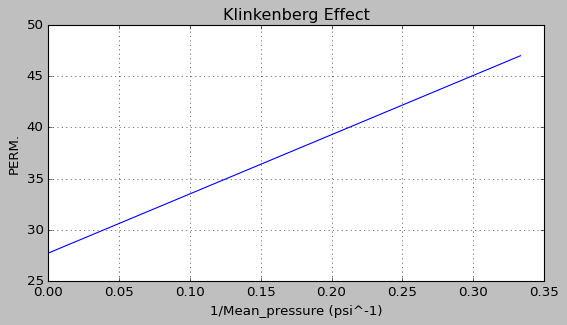

In [23]:
klinkenberg()

## Home Assignment 1
### Add functionaility for calculating  gas permeability at a given mean pressure, and plot that scatter in figure

# Pressure Profiling

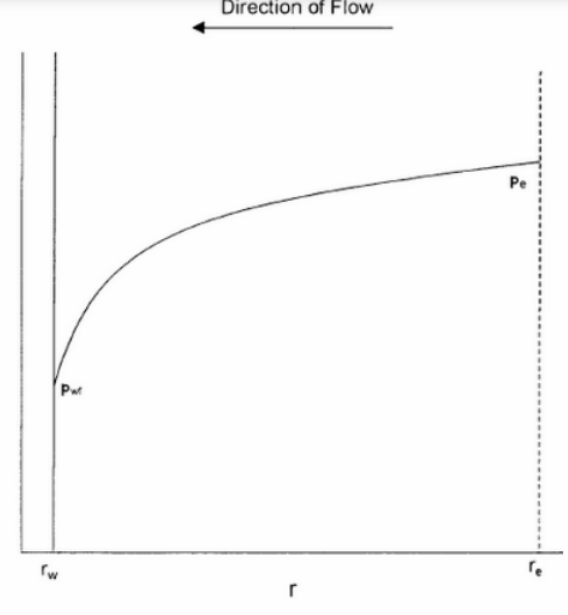

In [24]:
re = float(input('Outer radius of Reservoir(ft): '))
rw = float(input('We4llbore Radius(ft): '))
Pwf = float(input('Bottomhole Pressure(PSI): '))
h = float(input('Net Pay Thickness(ft): '))
k = float(input('Average Reservoir Permeability(mD): '))
q = float(input('Flowrate(STB/Day): '))
mu = float(input('Oil Viscosity: '))
B = 1

Outer radius of Reservoir(ft): 1800
We4llbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150
Flowrate(STB/Day): 200
Oil Viscosity: 15


In [25]:
r = np.linspace(rw,re,500)

In [27]:
Pressure = []
for i in range(len(r)):
    P = Pwf+ (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
    Pressure.append(P)

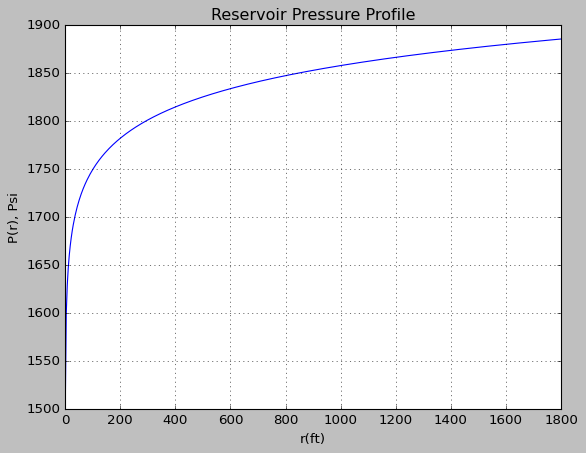

In [28]:
plt.figure(figsize = [8,6])
plt.plot(r,Pressure)
plt.xlabel('r(ft)')
plt.ylabel('P(r), Psi')
plt.title('Reservoir Pressure Profile')
plt.grid(True)

In [29]:
def pressureprof():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('We4llbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1
    r = np.linspace(rw,re,500)
    Pressure = []
    for i in range(len(r)):
        P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
        Pressure.append(P)
    plt.figure(figsize = [8,6])
    plt.plot(r,Pressure)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.grid(True)

Outer radius of Reservoir(ft): 1800
We4llbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150200
Flowrate(STB/Day): 15
Oil Viscosity: 15


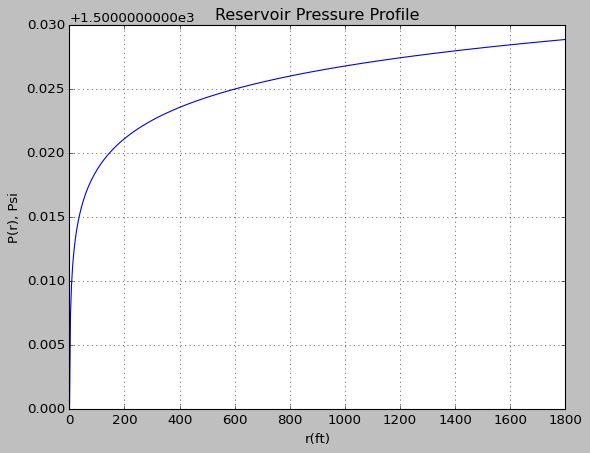

In [30]:
pressureprof()

## Dynamic Pressure Profile: Visualizing the effect of Viscosity, Flowrate and permeability

In [31]:
from ipywidgets import interactive

In [33]:
def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5
    r = np.linspace(rw,re,500)
    pe =4000
    B = 1
    h = 30
    
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    
    y_min = P[np.where(r==rw)]
    
    plt.plot(r,P,lw =4)
    plt.axhline(y_min,lw = 1,color = 'red')
    
    plt.ylim(0,5000)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')

    plt.title('Reservoir Pressure Profile')

    plt.grid(True)
    
    return r,P
    

In [34]:
w = interactive(flowprofile,k = (200,1000),mu = (10,220),q = (100,200))

In [35]:
w

interactive(children=(IntSlider(value=600, description='k', max=1000, min=200), IntSlider(value=115, descripti…

## IPRs

### Vogel IPR for saturated Reservoirs

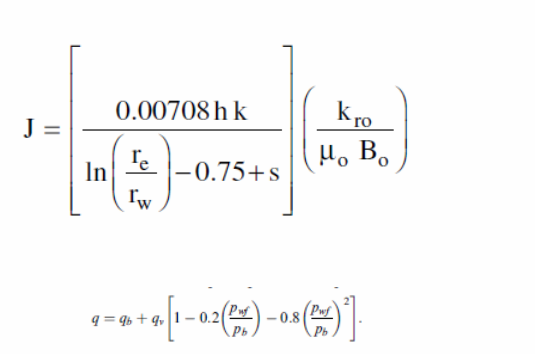

In [36]:
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Perm.(md): "))
h = float(input("Enter pay zone thicknes(Feet): "))
P = float(input("Enter  Reservoir Pressure(psi): "))
Pb = float(input("Enter Bubble Point Pressure(psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity  = float(input("Enter fluid viscosity(cp): "))
ct = float(input("Enter Total Compressibility(psi-1): "))
A = float(input("Enter Drainage Area(Acres): "))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft): "))
S = float(input("Enter Skin Factor: "))

Enter Porosity: 0.19
Enter Perm.(md): 8.2
Enter pay zone thicknes(Feet): 53
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.328
Enter Skin Factor: 0


In [37]:
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)

The value of productivity index is 0.19678102247296522


In [38]:
qmax = J*P/1.8

In [39]:
print("The value of Qmax is ", qmax, "stb/day")


The value of Qmax is  617.783087774848 stb/day


In [40]:
a = np.arange(0,P,500)

In [41]:
a

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])

In [42]:
b = np.append(a,P)

In [43]:
b

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500., 5651.])

In [44]:
pwf = b[-1::-1]

In [45]:
pwf

array([5651., 5500., 5000., 4500., 4000., 3500., 3000., 2500., 2000.,
       1500., 1000.,  500.,    0.])

In [47]:
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)

In [48]:
flowrate

[0.0,
 29.361052575575666,
 121.54544965238878,
 205.99154977200774,
 282.69935293443274,
 351.6688591396637,
 412.9000683877007,
 466.3929806785436,
 512.1475960121925,
 550.1639143886474,
 580.4419358079083,
 602.9816602699751,
 617.783087774848]

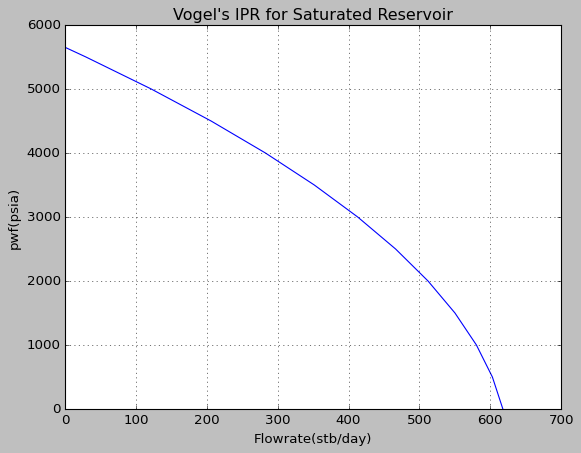

In [50]:
plt.figure()
plt.plot(flowrate,pwf)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for Saturated Reservoir")
plt.grid(True)
plt.show()

In [51]:
def vogel():
    porosity = float(input("Enter Porosity: "))
    K = float(input("Enter Perm.(md): "))
    h = float(input("Enter pay zone thicknes(Feet): "))
    P = float(input("Enter  Reservoir Pressure(psi): "))
    Pb = float(input("Enter Bubble Point Pressure(psi): "))
    Bo = float(input("Enter Formation Volume Factor: "))
    Viscosity  = float(input("Enter fluid viscosity(cp): "))
    ct = float(input("Enter Total Compressibility(psi-1): "))
    A = float(input("Enter Drainage Area(Acres): "))
    re = np.sqrt(43560*A/3.14)
    rw = float(input("Enter Wellbore radius(ft): "))
    S = float(input("Enter Skin Factor: "))
    J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
    print("The value of productivity index is", J)
    qmax = J*P/1.8
    print("The value of Qmax is ", qmax, "stb/day")
    a = np.arange(0,P,500)
    b = np.append(a,P)
    pwf = a[-1::-1]
    pwf
    flowrate = []
    for i in pwf:
        q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
        flowrate.append(q)
    flowrates = np.array(flowrate)
    flowrates
    plt.figure()
    plt.plot(flowrates,pwf)
    plt.xlabel("Flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.title("Vogel's IPR for Saturated Reservoir")
    plt.show()

Enter Porosity: 0.2
Enter Perm.(md): 9
Enter pay zone thicknes(Feet): 60
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.3
Enter Skin Factor: 0
The value of productivity index is 0.24192385916031528
The value of Qmax is  759.506515619412 stb/day


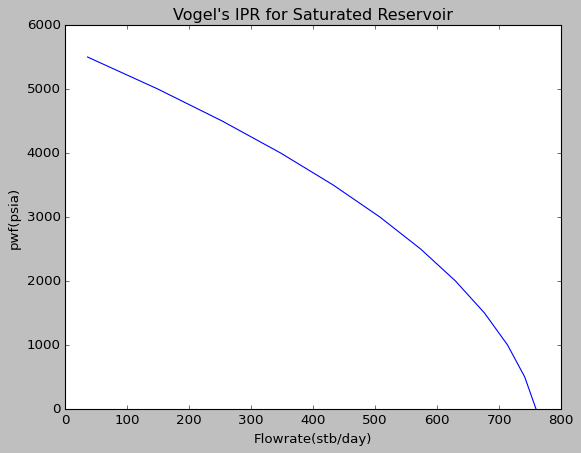

In [52]:
vogel()

## Home Assignment 2:

=> Build a VOgel IPR function in which Reservoir pressure is greater than Bubble Point Pressure

## Comparison Between Vogel and Fetkovich IPR

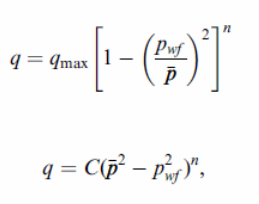

In [53]:
Pr = float(input("Enter the Reservoir Pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure(psia): "))
q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure(psia): "))
q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800


In [54]:
# Vogel Calculation
qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))


In [55]:
qmax

978.2608695652175

In [56]:
Pressures = np.arange(0,Pr+500,500)

flowrate_vogel = []
for i in Pressures:
    q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(q)
flowrates_vogel = np.array(flowrate_vogel)

In [57]:
## fetkovich
n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
C = q1/((Pr**2-Pwf1**2)**n)

In [58]:
flowrate_Fetkovich = []
for j in Pressures:
    Q = float(C*((Pr**2-j**2)**n))
    flowrate_Fetkovich.append(Q)
flowrates_Fetkovich =np.array(flowrate_Fetkovich)

In [59]:
df = pd.DataFrame()
df['Pressures'] = Pressures
df['flowrate_vogel'] = flowrates_vogel
df['flowrate_Fetko'] = flowrates_Fetkovich

In [60]:
df

,Pressures,flowrate_vogel,flowrate_Fetko
0,0.0,978.260870,900.0
1,500.0,923.913043,875.0
2,1000.0,826.086957,800.0
3,1500.0,684.782609,675.0
4,2000.0,500.000000,500.0
5,2500.0,271.739130,275.0
6,3000.0,0.000000,0.0


   Pressures  flowrate_vogel  flowrate_Fetko
0        0.0      978.260870           900.0
1      500.0      923.913043           875.0
2     1000.0      826.086957           800.0
3     1500.0      684.782609           675.0
4     2000.0      500.000000           500.0
5     2500.0      271.739130           275.0
6     3000.0        0.000000             0.0


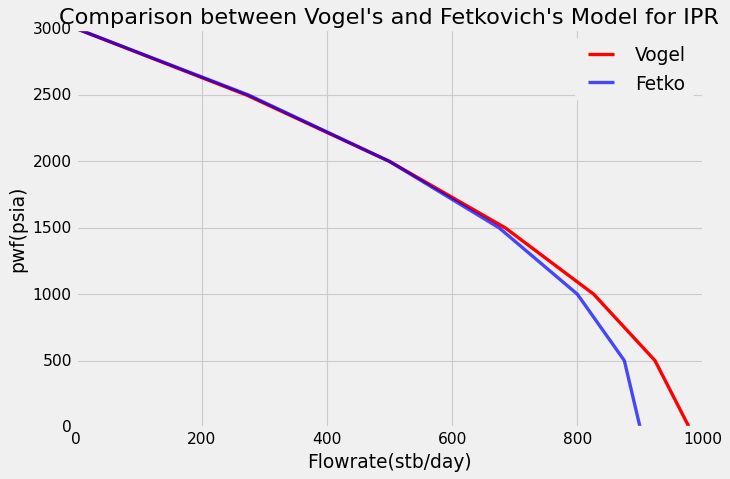

In [62]:
plt.figure(figsize = (9,6))
plt.style.use('fivethirtyeight')
plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3,label = 'Vogel')
plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3,label = 'Fetko')
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.legend( loc = "best")
plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
print(df)

In [63]:
def comparison_vogel_fetko():
    Pr = float(input("Enter the Reservoir Pressure(psia): "))
    Pwf1 = float(input("Enter the first testing pressure(psia): "))
    q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
    Pwf2 = float(input("Enter the second testing pressure(psia): "))
    q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))
    ##Vogel Calculations-
    qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))
    Pressures = np.arange(0,3500,500)
    flowrate_vogel = []
    for i in Pressures:
        q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
        flowrate_vogel.append(q)
    flowrates_vogel = np.array(flowrate_vogel)
    ##Fetkovich calculation_
    n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
    C = q1/((Pr**2-Pwf1**2)**n)
    flowrate_Fetkovich = []
    for j in Pressures:
        Q = float(C*((Pr**2-j**2)**n))
        flowrate_Fetkovich.append(Q)
    flowrates_Fetkovich =np.array(flowrate_Fetkovich)
    ##Dataframe and Plotting
    flowrates_Fetkovich = pd.Series(flowrate_Fetkovich)
    flowrates_vogel = pd.Series(flowrate_vogel)
    Pressure = pd.Series(Pressures)
    df = pd.DataFrame()
    df["Pressures"] = Pressure
    df["flowrates_vogel"] =flowrates_vogel
    df["flowrates_Fetkovich"] = flowrates_Fetkovich
    flowrate = df[["flowrates_vogel","flowrates_Fetkovich"]]
    plt.figure(figsize = (9,6))
    plt.style.use('fivethirtyeight')
    plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3)
    plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3)
    plt.xlabel("Flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.grid(True)
    plt.legend(flowrate, loc = "best")
    plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
    print(df)

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800
   Pressures  flowrates_vogel  flowrates_Fetkovich
0          0       978.260870                900.0
1        500       923.913043                875.0
2       1000       826.086957                800.0
3       1500       684.782609                675.0
4       2000       500.000000                500.0
5       2500       271.739130                275.0
6       3000         0.000000                  0.0


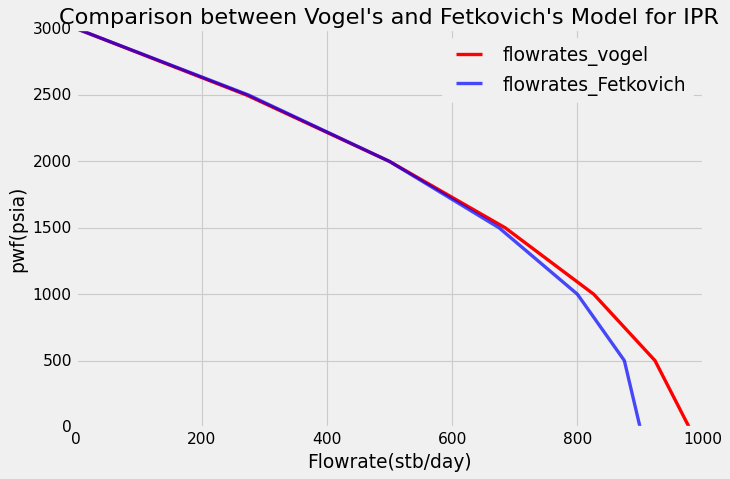

In [64]:
comparison_vogel_fetko()

## Material Balance

### 1. Gas Material Balance

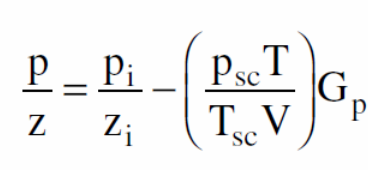

In [65]:
Time = [ 0,0.5,1,1.5,2]
ReservoirPressure = [1798,1680,1540,1428,1335]
Z = [0.869,0.870,0.880,0.890,0.900]
Gp = [0,0.96,2.12,3.21,3.92]

In [66]:
df = pd.DataFrame({"Time(years)":Time,"ReservoirPressure(psia)":ReservoirPressure, "Z factor": Z, "Cumulative Gas Produced Gp(MMMSCF)": Gp  })


In [67]:
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas Produced Gp(MMMSCF)
0,0.0,1798,0.869,0.00
1,0.5,1680,0.870,0.96
2,1.0,1540,0.880,2.12
3,1.5,1428,0.890,3.21
4,2.0,1335,0.900,3.92


In [68]:
df['P/Z'] = df['ReservoirPressure(psia)']/df['Z factor']

In [69]:
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


In [70]:
x = df["Cumulative Gas Produced Gp(MMMSCF)"]
y = df['P/Z']


(0.0, 2500.0)

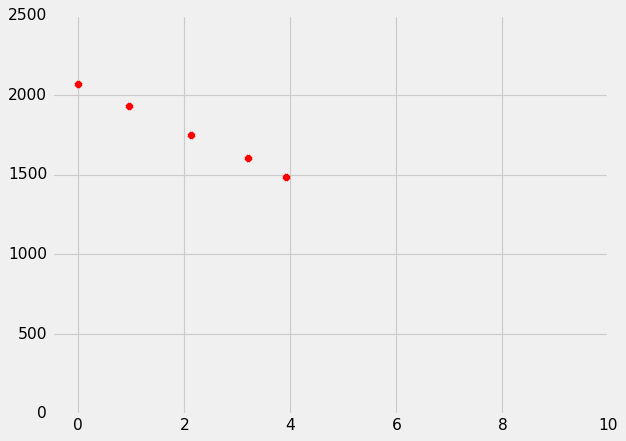

In [73]:
plt.scatter(x,y,marker = 'x',color = 'red')
plt.xlim(-0.5,10)
plt.ylim(0,2500)

In [74]:
model = np.polyfit(x,y,1)

In [75]:
model

array([-148.2874553 , 2070.38439919])

In [76]:
PZ = np.arange(model[1],0,-1)

In [79]:
GPP = (PZ-model[1])/model[0]

In [80]:
DF = pd.DataFrame({"Cumulative Gas Produced Gp(MMMSCF)": GPP, "P/Z": PZ})
DF

,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [81]:
initial_gas_in_place =  (-model[1])/(model[0])

In [83]:
initial_gas_in_place

13.96196593265718

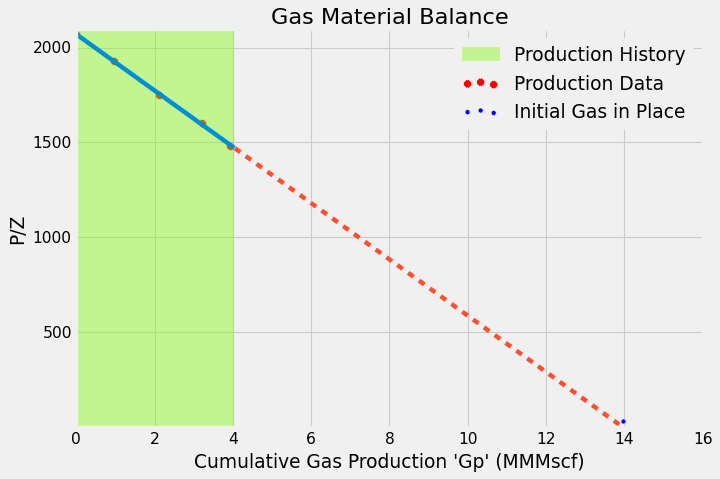

The Gas Initially in place is 13.96196593265718 MMMscf


In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,6))
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][1:600],DF["P/Z"][1:600])
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][601:2072],DF["P/Z"][601:2072], ls = "--")
plt.scatter(x,y,marker = 'x',color = 'red',label = "Production Data")
plt.scatter(initial_gas_in_place,30, label = "Initial Gas in Place")
plt.xlim(0,16)
plt.ylim(1,2100)
plt.axvspan(0,4,alpha=0.4,label='Production History',color='chartreuse')
plt.xlabel("Cumulative Gas Production 'Gp' (MMMscf)")
plt.ylabel("P/Z")
plt.title("Gas Material Balance")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("The Gas Initially in place is", initial_gas_in_place,"MMMscf")

## Oil Material Balance for Undersaturated

In [89]:
swi = float(input("Enter the intial water saturation(fraction) : "))
cw = float(input("Enter the compressibility of water(psi-1) : "))
cf = float(input("Enter the compressibility of formation(psi-1)) : "))
Pb = float(input("Enter the Bubble point pressure(psi) : "))

Enter the intial water saturation(fraction) : 0.24
Enter the compressibility of water(psi-1) : 0.00000362
Enter the compressibility of formation(psi-1)) : 0.000004958
Enter the Bubble point pressure(psi) : 1500


In [90]:
ReservoirPressure = [3685, 3680,3676,3667,3664,3640,3605,3567,3515,3448,3360,3275,3188]
No_of_producing_wells = [1,2,2,3,4,19,25,36,48,59,59,61,61]
Bo = [1.3102,1.3104,1.3104,1.3105,1.3105,1.3109,1.3116,1.3122,1.3128,1.3130,1.3150,1.3160,1.3170]
Np = [0,20.481,34.750,78.557,101.846,215.681,364.613, 542.985,841.591,1273.530 ,1691.887,2127.077,2575.330 ]
Wp = [0,0,0,0,0,0,0,0.159,0.805,2.579,5.008,6.5,8]

In [91]:
df = pd.DataFrame({"Reservoir Pressure":ReservoirPressure,"No_of_producing_wells":No_of_producing_wells, "Bo(rb/stb)": Bo, "Cumulative oil Produced Np(Mstb)": Np,"Cumulative water Produced Wp(Mstb)": Wp })


In [93]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb)
0,3685,1,1.3102,0.000,0.000
1,3680,2,1.3104,20.481,0.000
2,3676,2,1.3104,34.750,0.000
3,3667,3,1.3105,78.557,0.000
4,3664,4,1.3105,101.846,0.000
5,3640,19,1.3109,215.681,0.000
6,3605,25,1.3116,364.613,0.000
7,3567,36,1.3122,542.985,0.159
8,3515,48,1.3128,841.591,0.805
9,3448,59,1.3130,1273.530,2.579


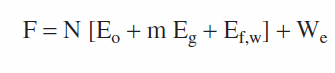

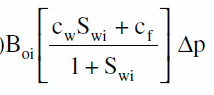

In [94]:
#the expansion of the initial water and the reduction in the pore volume
df["Efw"] = df["Bo(rb/stb)"] * ((((cw*swi)+ cf)*(3685-df["Reservoir Pressure"]))/(1-swi))

In [95]:
#the expansion of oil and its originally dissolved gas
df["Eo"] = df["Bo(rb/stb)"]- 1.3102

In [99]:
df["Eo+Efw"] = df['Efw']+df['Eo']

In [100]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,F(Mbbl),Eo+Efw
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000050,0.0002,26.838302,0.000250
2,3676,2,1.3104,34.750,0.000,0.000090,0.0002,45.536400,0.000290
3,3667,3,1.3105,78.557,0.000,0.000181,0.0003,102.948949,0.000481
4,3664,4,1.3105,101.846,0.000,0.000211,0.0003,133.469183,0.000511
5,3640,19,1.3109,215.681,0.000,0.000452,0.0007,282.736223,0.001152
6,3605,25,1.3116,364.613,0.000,0.000804,0.0014,478.226411,0.002204
7,3567,36,1.3122,542.985,0.159,0.001187,0.0020,712.663917,0.003187
8,3515,48,1.3128,841.591,0.805,0.001711,0.0026,1105.645665,0.004311
9,3448,59,1.3130,1273.530,2.579,0.002386,0.0028,1674.723890,0.005186


In [97]:
df["F(Mbbl)"] = (df["Cumulative oil Produced Np(Mstb)"]*df["Bo(rb/stb)"]) + (df["Cumulative water Produced Wp(Mstb)"])
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,F(Mbbl)
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000050,0.0002,26.838302
2,3676,2,1.3104,34.750,0.000,0.000090,0.0002,45.536400
3,3667,3,1.3105,78.557,0.000,0.000181,0.0003,102.948949
4,3664,4,1.3105,101.846,0.000,0.000211,0.0003,133.469183
5,3640,19,1.3109,215.681,0.000,0.000452,0.0007,282.736223
6,3605,25,1.3116,364.613,0.000,0.000804,0.0014,478.226411
7,3567,36,1.3122,542.985,0.159,0.001187,0.0020,712.663917
8,3515,48,1.3128,841.591,0.805,0.001711,0.0026,1105.645665
9,3448,59,1.3130,1273.530,2.579,0.002386,0.0028,1674.723890


In [101]:
x = df["Eo+Efw"]
y = df["F(Mbbl)"]

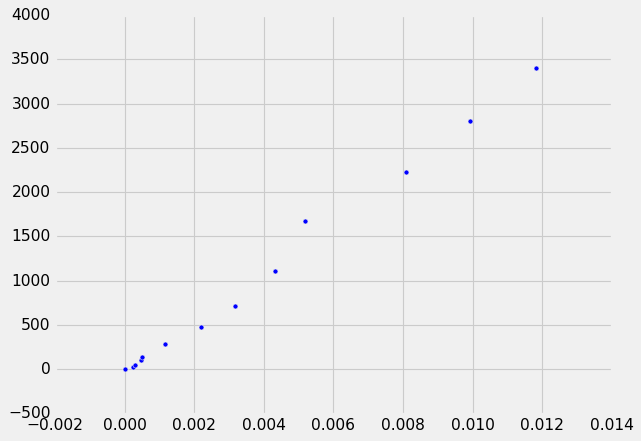

In [102]:
plt.scatter(x,y)

In [103]:
model = np.polyfit(x, y, 1)
model

array([ 2.8933007e+05, -5.5198515e+01])

In [104]:
df["F(Mbbl)_Fit"] = 289497.643*df["Eo+Efw"] - 55.2132201


In [105]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,F(Mbbl),Eo+Efw,F(Mbbl)_Fit
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000,-55.213220
1,3680,2,1.3104,20.481,0.000,0.000050,0.0002,26.838302,0.000250,17.228687
2,3676,2,1.3104,34.750,0.000,0.000090,0.0002,45.536400,0.000290,28.862590
3,3667,3,1.3105,78.557,0.000,0.000181,0.0003,102.948949,0.000481,83.992630
4,3664,4,1.3105,101.846,0.000,0.000211,0.0003,133.469183,0.000511,92.718723
5,3640,19,1.3109,215.681,0.000,0.000452,0.0007,282.736223,0.001152,278.366475
6,3605,25,1.3116,364.613,0.000,0.000804,0.0014,478.226411,0.002204,582.974609
7,3567,36,1.3122,542.985,0.159,0.001187,0.0020,712.663917,0.003187,867.453624
8,3515,48,1.3128,841.591,0.805,0.001711,0.0026,1105.645665,0.004311,1192.827086
9,3448,59,1.3130,1273.530,2.579,0.002386,0.0028,1674.723890,0.005186,1446.056591


The Oil Initially in place is 289330.06960112334 STB given by slope of the straight line
Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' 


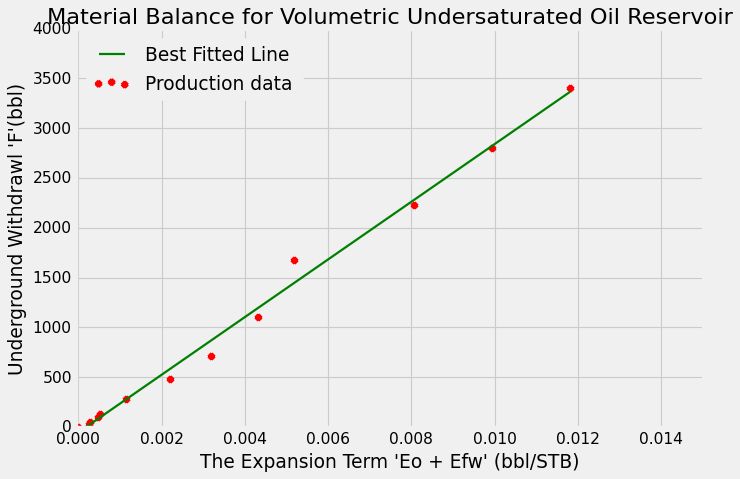

In [108]:
plt.figure(figsize = (9,6))
plt.scatter(x,y,marker = 'x',color = 'red',label = "Production data")
plt.plot(x,df["F(Mbbl)_Fit"], label = "Best Fitted Line ", color = 'green', lw = 2)

plt.xlim(-0.00005,0.015)
plt.ylim(-0.5,4000)
plt.xlabel("The Expansion Term 'Eo + Efw' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Volumetric Undersaturated Oil Reservoir")
plt.grid(True)
plt.legend(loc='best')

print("The Oil Initially in place is", model[0],"STB given by slope of the straight line")
print("Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' ")
plt.show()

## Gascap MBAL

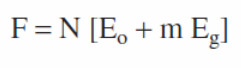

In [109]:
ReservoirPressure = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
Rp = [0,1050,1060,1160,1235,1265,1300]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Rs = [510,477,450,425,401,375,352]
Bg  = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]

In [110]:
df = pd.DataFrame({"Reservoir Pressure(psia)":ReservoirPressure,"Np(MMstb)" : Np,"Rp(scf/stb)":Rp,"Bo(rb/stb)":Bo,"Rs(scf/stb)":Rs,"Bg(rb/scf)":Bg})
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [111]:
#Total Underground Withdrawl F Term
df["F(MM rb)"] = df["Np(MMstb)"]*(df['Bo(rb/stb)']+(df["Rp(scf/stb)"]-df["Rs(scf/stb)"])*df["Bg(rb/scf)"])  

In [112]:
#The Eo Term expansion of oil and dissolved gas
df["Eo(rb/stb)"] = (df["Bo(rb/stb)"]- 1.2511 ) + (510- df["Rs(scf/stb)"])*df["Bg(rb/scf)"]

In [113]:
#The Eg Ter expansion of gas cap
df["Eg(rb/stb)"] = 1.2511*((df["Bg(rb/scf)"]/0.00087) - 1)

In [114]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb)
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555


In [115]:
dff = df

In [118]:
M = [0.3,0.4,0.5,0.6,0.7]

In [119]:
for i in M:
    dff["Eo+M{}Eg".format(i)] = dff["Eo(rb/stb)"] + i*dff["Eg(rb/stb)"]

In [120]:
dff

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889


The Oil Initially in place is 155.43003852376873 MMSTB for m =  0.3
The Oil Initially in place is 131.77712071961056 MMSTB for m =  0.4
The Oil Initially in place is 114.37046619758794 MMSTB for m =  0.5
The Oil Initially in place is 101.02489219651802 MMSTB for m =  0.6
The Oil Initially in place is 90.46788437559395 MMSTB for m =  0.7


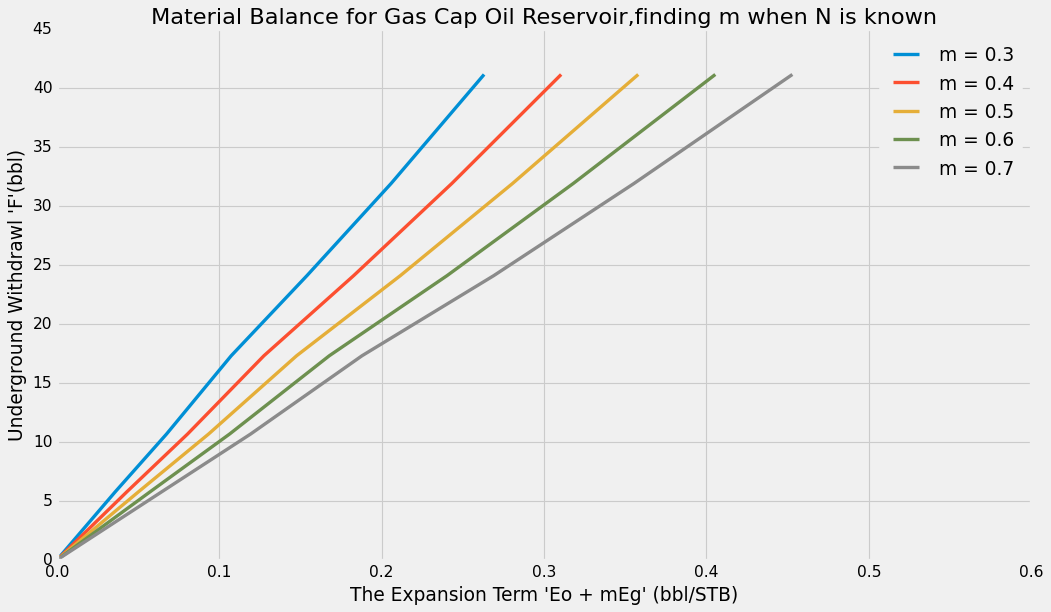

In [121]:
plt.figure(figsize = (14,8))
plt.style.use('fivethirtyeight')

plt.xlim(0,0.6)
plt.ylim(0,45)
    
plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Gas Cap Oil Reservoir,finding m when N is known")

for i in M:
    plt.plot(dff["Eo+M{}Eg".format(i)],dff["F(MM rb)"],label = "m = {}".format(i) ,lw = 3)
    plt.legend(loc='best')
    xx = dff["Eo+M{}Eg".format(i)]
    yy = dff["F(MM rb)"]
    Model = np.polyfit(xx, yy, 1)
    print("The Oil Initially in place is", Model[0],"MMSTB for m = ", i )

In [122]:
def Gascap(m):
    df["Eo+mEg(rb/stb)"] =  df["Eo(rb/stb)"] + m*df["Eg(rb/stb)"]
    x = df["Eo+mEg(rb/stb)"]
    y = df["F(MM rb)"]
    model = np.polyfit(x, y, 1)
    print("The Oil Initially in place is", model[0],"MMSTB given by slope of the straight line")
    
    
    adf = df[["Reservoir Pressure(psia)","F(MM rb)","Eo+mEg(rb/stb)"]]
    print(adf)
    
    plt.figure(figsize = (10,6))
    plt.style.use('fivethirtyeight')
    plt.plot(df["Eo+mEg(rb/stb)"],df["F(MM rb)"],color = "lime")
    
    
    plt.xlim(-0.05,0.6)
    plt.ylim(-0.05,45)
    
    plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
    plt.ylabel("Underground Withdrawl 'F'(bbl)")
    plt.title("Material Balance for Gas Cap Oil Reservoir")
   
    
    
    return df["Eo+mEg(rb/stb)"],df["F(MM rb)"]

In [123]:
w = interactive(Gascap, m = (0.000001,1,0.1))

In [124]:
w

interactive(children=(FloatSlider(value=0.400001, description='m', max=1.0, min=1e-06), Output()), _dom_classe…

## When N is also Unknow

In [125]:
dff["F/Eo(stb)"] = dff["F(MM rb)"]/dff["Eo(rb/stb)"]
dff["Eg/Eo"] = dff["Eg(rb/stb)"]/dff["Eo(rb/stb)"]
bdf = dff[["Reservoir Pressure(psia)","F/Eo(stb)","Eg/Eo"]]
bdf

,Reservoir Pressure(psia),F/Eo(stb),Eg/Eo
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439
6,2400,340.762668,3.931692


In [126]:
XX = bdf["Eg/Eo"][1:7]
YY = dff["F/Eo(stb)"][1:7]
MODEL = np.polyfit(XX, YY, 1)
MODEL

array([ 58.83013376, 108.70272737])

In [127]:
XXFitted = list(XX)
XXFitted.append(0)
XXFitted

[4.938344701275751,
 4.509551844286939,
 4.288103019842596,
 4.246407727776458,
 3.992439444986536,
 3.9316915692940655,
 0]

In [128]:
YYFitted= []
for i in XXFitted:
    a = MODEL[0]*i + MODEL[1]
    YYFitted.append(a)
YYFitted

[399.22620669354836,
 374.0002655622318,
 360.97240159952116,
 358.519461990173,
 343.5784739432399,
 340.0046682907106,
 108.7027273721996]

The equation of the Line is: F/Eo = mN(Eg/Eo)+N
The Value of intial oil in place is  108.7027273721996 MMSTB given by intercept of the line
The value of intial ratio in reservoir(m) is 0.5412020027520325 given by slope(m*N)/intercept(N) of the line


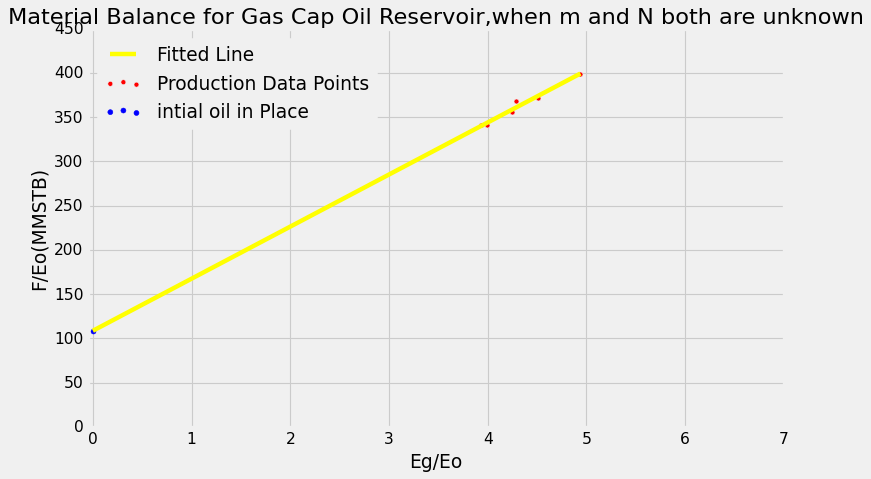

In [129]:
plt.figure(figsize = (10,6))
plt.plot(XXFitted,YYFitted, label = "Fitted Line",color = 'yellow')
plt.scatter(bdf["Eg/Eo"],bdf["F/Eo(stb)"],c = "red", label = "Production Data Points")
plt.scatter(0,MODEL[1], color = "b", label = "intial oil in Place")
plt.xlabel("Eg/Eo")
plt.ylabel('F/Eo(MMSTB)')
plt.title("Material Balance for Gas Cap Oil Reservoir,when m and N both are unknown")
plt.legend(loc='best')
plt.xlim(-0.05,7)
plt.ylim(0,450)
print("The equation of the Line is: F/Eo = mN(Eg/Eo)+N")
print("The Value of intial oil in place is ",MODEL[1], "MMSTB given by intercept of the line")
print("The value of intial ratio in reservoir(m) is",MODEL[0]/MODEL[1],"given by slope(m*N)/intercept(N) of the line" )

## Effect  of Skin

In [130]:
k = float(input("enter valve of resrevoir rock permeabulity in md : "))
q = float(input("enter value of oil flow in standard bbl per day : "))
B0 = float(input("enter value of oil formation volume in bbl/STB : "))
viscosity = float(input("enter value of oil viscosity in cp : "))
h = float(input("enter value of thickness of reservoir in feet :"))
pe = float(input("enter value of reservoir boundary pressure in psi :"))
re = float(input("enter outer radius of reservoir in feet: "))
rw = float(input("enter wellbore radius in feet: "))

enter valve of resrevoir rock permeabulity in md : 120
enter value of oil flow in standard bbl per day : 600
enter value of oil formation volume in bbl/STB : 1.25
enter value of oil viscosity in cp : 2.5
enter value of thickness of reservoir in feet :25
enter value of reservoir boundary pressure in psi :2500
enter outer radius of reservoir in feet: 745
enter wellbore radius in feet: 0.25


In [131]:
r = np.linspace(rw,re,8000)

In [132]:
r

array([2.50000000e-01, 3.43105388e-01, 4.36210776e-01, ...,
       7.44813789e+02, 7.44906895e+02, 7.45000000e+02])

In [133]:
df = pd.DataFrame({"r" : r})
df["p"] = pe - ((141.2*q*B0*viscosity*np.log(re/df["r"]))/(k*h))

In [134]:
df

,r,p
0,0.250000,1794.028365
1,0.343105,1821.966262
2,0.436211,1843.154020
3,0.529316,1860.226897
4,0.622422,1874.526193
...,...,...
7995,744.627578,2499.955873
7996,744.720684,2499.966907
7997,744.813789,2499.977939
7998,744.906895,2499.988970


In [139]:
def skin_effect(s,rs):
    plt.figure(figsize = (15,8))
    ks = (k*(np.log(rs/rw)))/(s + np.log(rs/rw))
    t = np.linspace(rw,rs,1000)
    rf = pd.DataFrame({'t':t})
    rf["q"] = pe - (141.2*q*B0*viscosity*(((np.log(re/rs))/k)+(np.log(rs/rf["t"]))/ks))/h
    plt.plot(df["r"],df["p"], c = "b" , label= " Pressure profile of undamaged well")
    plt.plot(rf["t"],rf["q"], c = "r", label= " Pressure profile of damaged well")
    plt.xlim(0.3,50)
    plt.ylim(1000,2500)
    plt.xlabel("radius from wellbore")
    plt.ylabel("reservoir pressure")
    plt.legend()
    plt.title("Skin and skin zone effect on reservoir pressure drowdown")
    plt.grid(True, color = 'g')

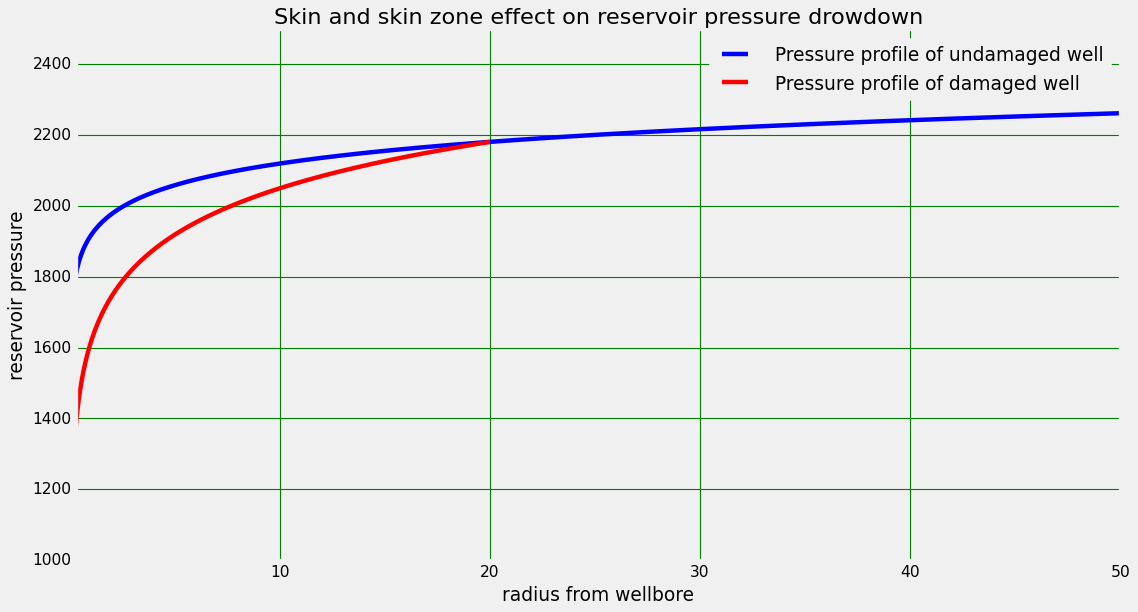

In [140]:
skin_effect(5,20)

In [143]:
skin_interactive = interactive(skin_effect,s = (-3,10,0.2),rs = (0.5,25,0.2))

In [144]:
skin_interactive

interactive(children=(FloatSlider(value=3.0, description='s', max=10.0, min=-3.0, step=0.2), FloatSlider(value…

## #